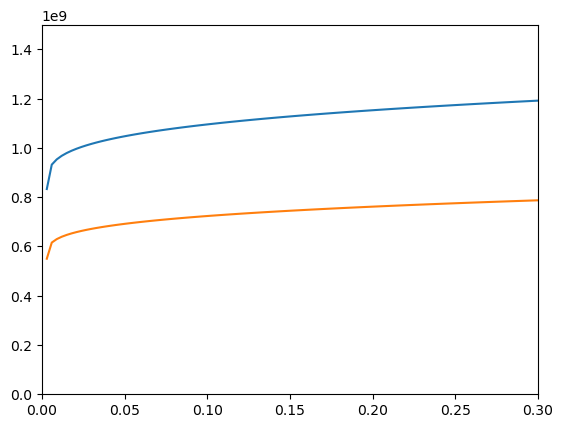

In [19]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Johnson Cook
#-----------------------------------
A_jc = 790.0E6
B_jc = 478.0E6
n_jc = 0.28
m_jc = 1.0
C_jc = 0.032

T_amb = 273.0
T_m = 1773.0

e_max=0.3

#FIXED PARAMS
T_ = 300.0
T_hot = 800
Th = (T_-T_amb)/(T_m - T_amb)
Thot = (T_hot-T_amb)/(T_m - T_amb)

e  = np.zeros (100)
sy_jc = np.zeros (100)
sy_hot = np.zeros (100)
#delta_e =( e_max - e_min)/100
er_= 10.0

de=e_max/100
ee = 0.0
for i in range (100):
  e[i]=ee
  ee+=de
    
for i in range (100):
        #T_=(T-T_amb)/(T_m-T_amb)
        #e[i] = ev
  sy_jc[i] = (A_jc + B_jc*math.pow(e[i],n_jc))*(1+C_jc*math.log(er_))*(1.0-math.pow(Th,m_jc))
  sy_hot[i] = (A_jc + B_jc*math.pow(e[i],n_jc))*(1+C_jc*math.log(er_))*(1.0-math.pow(Thot,m_jc))
  #print(math.pow(e[i],n_jc))
        #sy[i] = 1.0
        #print(sy[i])
        #ev +=delta_e
    #df['f'].plot()
  e[i]+=de 
plt.plot(e,sy_jc)
plt.plot(e,sy_hot)
plt.ylim((0,1.5e9))
plt.xlim((0,0.3))
#plt.plot(e,sy_jc)
plt.show()




In [38]:
#https://scipy-lectures.org/packages/sympy.html
#https://docs.sympy.org/latest/tutorials/intro-tutorial/manipulation.html
import sympy as sym
x  = sym.Symbol('x')
e, er, T = sym.symbols('ep epr T')
n1,n2 = sym.symbols('n1 n2')
I1,I2 = sym.symbols('I1 I2')
n1 = sym.Symbol('n1');sym.Symbol('n2');
sy = sym.Pow(e,n1*T+n2)*sym.exp((I1*T+I2)/e)
#sy[i] = C1 * math.exp(C2*T_)*math.pow(e[i],n1*T_+n2)*math.exp((I1*T_+I2)/e[i])*math.pow(er_,m1*T_+m2)
sym.diff(sy,e,0)


ep**(T*n1 + n2)*exp((I1*T + I2)/ep)

In [39]:
sym.diff(sy,e,1)

ep**(T*n1 + n2)*(T*n1 + n2)*exp((I1*T + I2)/ep)/ep - ep**(T*n1 + n2)*(I1*T + I2)*exp((I1*T + I2)/ep)/ep**2

In [40]:
sym.simplify(sym.diff(sy,e,1))

ep**(T*n1 + n2 - 2)*(-I1*T - I2 + T*ep*n1 + ep*n2)*exp((I1*T + I2)/ep)

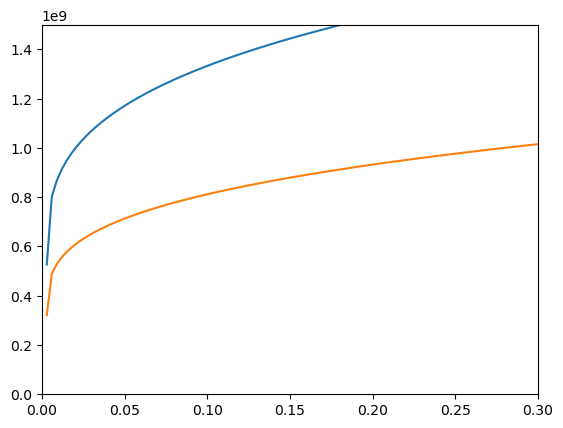

1910000000.0


In [27]:
#### PAPER 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Johnson Cook
#-----------------------------------
A_jc = 460.0E6
B_jc = 1450.0E6
n_jc = 0.31
m_jc = 0.85
C_jc = 0.08

T_amb = 273.0
T_m = 1773.0

e_max=0.3

#FIXED PARAMS
T_ = 300.0
T_hot = 800
Th = (T_-T_amb)/(T_m - T_amb)
Thot = (T_hot-T_amb)/(T_m - T_amb)

e  = np.zeros (100)
sy_jc = np.zeros (100)
sy_hot = np.zeros (100)
#delta_e =( e_max - e_min)/100
er_= 10.0

de=e_max/100
ee = 0.0
for i in range (100):
  e[i]=ee
  ee+=de
    
for i in range (100):
        #T_=(T-T_amb)/(T_m-T_amb)
        #e[i] = ev
  sy_jc[i] = (A_jc + B_jc*math.pow(e[i],n_jc))*(1+C_jc*math.log(er_))*(1.0-math.pow(Th,m_jc))
  sy_hot[i] =(A_jc + B_jc*math.pow(e[i],n_jc))*(1+C_jc*math.log(er_))*(1.0-math.pow(Thot,m_jc))
  #print(math.pow(e[i],n_jc))
        #sy[i] = 1.0
        #print(sy[i])
        #ev +=delta_e
    #df['f'].plot()
  e[i]+=de 
plt.plot(e,sy_jc)
plt.plot(e,sy_hot)
plt.ylim((0,1.5e9))
plt.xlim((0,0.3))
#plt.plot(e,sy_jc)
plt.show()


print(A_jc+B_jc*pow(1,0.31))


[0.01812937 0.31850184]
0.30119421191220214
0.0


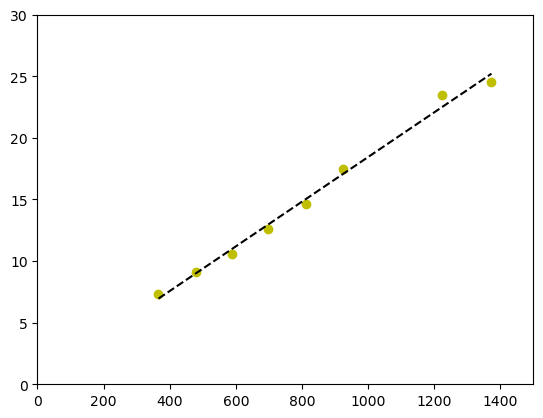

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x = [93+273,205+273,315+273,425+273,540+273,650+273,950+273,1100+273]
y = [7.3,9.1,10.6,12.6,14.6,17.5,23.5,24.5] # 10, not 9, so the fit isn't perfect

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print(coef)

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(0, 1500)
plt.ylim(0, 30)
